In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [5]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [6]:
train["Count_3-6_months_late"].describe()

count    79756.000000
mean         0.248671
std          0.691468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: Count_3-6_months_late, dtype: float64

In [7]:
train["Count_3-6_months_late"].fillna(1,inplace=True)

In [8]:
train["Count_6-12_months_late"].fillna(1,inplace=True)

In [9]:
train["Count_more_than_12_months_late"].fillna(1,inplace=True)

In [10]:
train["application_underwriting_score"].fillna(np.mean(train["application_underwriting_score"]),inplace=True)

In [11]:
test["Count_3-6_months_late"].fillna(1,inplace=True)

In [12]:
test["Count_6-12_months_late"].fillna(1,inplace=True)

In [13]:
test["Count_more_than_12_months_late"].fillna(1,inplace=True)

In [14]:
test["application_underwriting_score"].fillna(np.mean(test["application_underwriting_score"]),inplace=True)

In [15]:
train["Count_3-6_months_late"].describe()

count    79853.000000
mean         0.249584
std          0.691543
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: Count_3-6_months_late, dtype: float64

In [16]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [17]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [18]:
train.loc[train["residence_area_type"]=="Urban","residence_area_type"]=1.0

In [19]:
train.loc[train["residence_area_type"]=="Rural","residence_area_type"]=0.0

In [20]:
test.loc[test["residence_area_type"]=="Urban","residence_area_type"]=1.0

In [21]:
test.loc[test["residence_area_type"]=="Rural","residence_area_type"]=0.0

In [22]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,1,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,1,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,1,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e5324070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e5324730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e5310cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e5324df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e5332130>],
 'means': []}

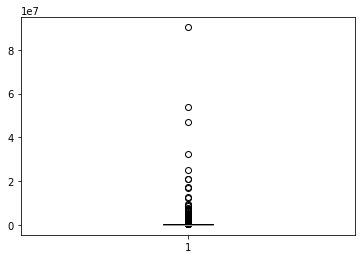

In [23]:
plt.boxplot(train["Income"])

# Outlier Treatment

In [24]:
train.loc[train["Income"]>train["Income"].quantile(0.75),"Income"]=np.mean(train["Income"])

In [25]:
test.loc[test["Income"]>test["Income"].quantile(0.75),"Income"]=np.mean(test["Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e4e9b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e4e9ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e4e9b070>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e4ea6190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e4ea64c0>],
 'means': []}

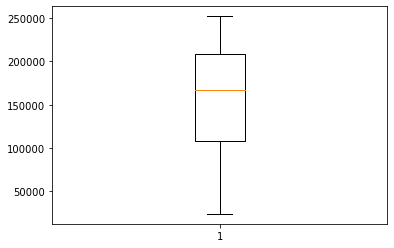

In [26]:
plt.boxplot(train["Income"])

# Split data frame

In [27]:
final_test=test.drop(["id","sourcing_channel"],axis=1)

In [28]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y,test_y = train_test_split(train.drop(["id","target","sourcing_channel"],1),np.exp(train["target"]),test_size = 0.2,train_size=0.2, random_state = 25)

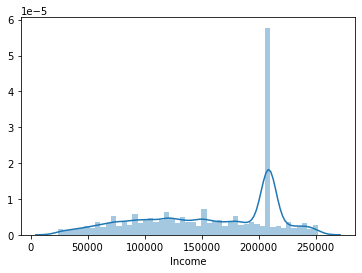

In [29]:
sn.distplot(train["Income"])

In [30]:
train_x=pd.get_dummies(train_x)

In [31]:
test_x=pd.get_dummies(test_x)

In [32]:
test_x.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,residence_area_type_0.0,residence_area_type_1.0
19602,0.023,20083,175060.000000,0.0,0.0,0.0,99.47,20,0,1
12724,0.563,21550,180140.000000,0.0,0.0,0.0,99.27,12,1,0
1763,0.146,13147,208847.171177,0.0,0.0,0.0,99.25,13,0,1
14247,0.041,27021,63150.000000,0.0,0.0,0.0,99.38,6,0,1
46742,0.000,17166,208847.171177,0.0,0.0,0.0,98.84,16,1,0


In [33]:
final_test=pd.get_dummies(final_test)

In [34]:
dt_reg =LinearRegression()

In [35]:
dt_reg.fit(train_x,train_y)

LinearRegression()

In [36]:
predict = dt_reg.predict(test_x)

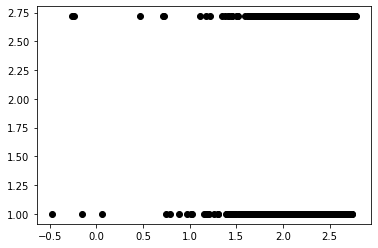

In [37]:
plt.scatter(predict, test_y,  color='black')

In [38]:
np.log(predict)

<ipython-input-38-a5f977eb24ec>:1: RuntimeWarning: invalid value encountered in log
  np.log(predict)


array([0.99445519, 0.96326435, 0.98858721, ..., 0.9695007 , 0.94137858,
       1.00603954])

In [39]:
predict_final = dt_reg.predict(final_test)

In [40]:
final_predict=np.log(predict_final)

In [41]:
submission = pd.DataFrame()

In [42]:
# creating a count column and saving the predictions in it
submission['target'] = final_predict

In [43]:
submission.to_csv('submission.csv', header=True, index=False)